In [1]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble

In [2]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Run Bike RF model for iputation

In [18]:
bdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_data.csv')
bdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0,671,2018,1,65.478571,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,0.0,0.797617,...,0,0,0,0,0,0,0,0,0,0
1,1,1,671,2018,2,60.928571,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,0.0,0.797617,...,0,0,0,0,0,0,0,0,0,0
2,2,2,671,2018,3,48.907143,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,0.0,0.797617,...,0,0,0,0,0,0,0,0,0,0
3,3,3,671,2018,4,52.942857,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,0.0,0.797617,...,0,0,0,0,0,0,0,0,0,0
4,4,4,671,2018,5,64.071429,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,0.0,0.797617,...,0,0,0,0,0,0,0,0,0,0


In [19]:
bdata0.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'ID', 'year', 'month', 'AASHTO_MADT',
       'geometry', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area',
       'Distance to water area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'pct_white',
       'pct_African_American', 'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Tota

In [21]:
# lets keep the data that we need for model tunning
bdata=bdata0.drop(['Unnamed: 0_x','Unnamed: 0.1', 'Unnamed: 0', 'ID',  'latitude', 'longitude', 'geometry','grass Area ', 'Distance to grass area','grass Area ','education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'Distance to grass area', 'Total Commuter','Name', 'name', 'highway', 'Bicycle_Fa', 'Unnamed: 0_y', 'edgeUID',
       'osmId', 'edge_uid', 'osmId.1', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'date',
       'days_in_month','road', 'city', 'county', 'state', 'country'],axis=1)
bdata.columns

Index(['year', 'month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'Bike Route', 'Bike Lane', 'Cycle Track',
       'Trail', 'cycleway', 'secondary', 'tertiary', 'primary', 'residential',

In [22]:
bdata.dtypes

year                                int64
month                               int64
AASHTO_MADT                       float64
min_dist_to_CBD                   float64
Commercial Area                   float64
Distance to commercial area       float64
retail Area                       float64
Distance to retail area           float64
industrial Area                   float64
Distance to industrial area       float64
residential Area                  float64
Distance to residential area      float64
forest Area                       float64
Distance to forest area           float64
water Area                        float64
Distance to water area            float64
park Area                         float64
Distance to Park Center           float64
School                              int64
min_dist_to_school                float64
college                             int64
min_dist_to_college               float64
University                          int64
min_dist_to_university            

In [23]:
bdata['AASHTO_MADT'].describe()

count    4226.000000
mean      451.890077
std       580.891590
min         5.235714
25%        97.110714
50%       209.510714
75%       599.773214
max      5235.757143
Name: AASHTO_MADT, dtype: float64

In [24]:
bdata0.groupby(['month'])['ID'].count()

month
1     318
2     338
3     336
4     354
5     372
6     378
7     380
8     364
9     367
10    362
11    316
12    341
Name: ID, dtype: int64

In [25]:
# split data into X dataframe and Y dataframe:
X_data1 = bdata.drop("AASHTO_MADT", axis=1)
Y_data1 = bdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data1.shape} Y_data.shape: {Y_data1.shape}")

X_data.shape: (4226, 50) Y_data.shape: (4226,)


In [26]:
features1 = bdata.drop("AASHTO_MADT", axis=1)
feature_list1 = list(features1.columns)

In [27]:
X1 = np.asarray(X_data1)
Y1 = np.asarray(Y_data1)
print(f"X.shape: {X1.shape} Y.shape: {Y1.shape}")

X.shape: (4226, 50) Y.shape: (4226,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X1, Y1, test_size=0.2,random_state=94704)

In [60]:
#https://github.com/ray-project/tune-sklearn?fbclid=IwAR11a7ctTD3l8kzS3zyyZJOn8p_KnAna8p0GZ1TnPRdeO3e0U9Fo8ZOFGQ0
from tune_sklearn import TuneGridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [61]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-12 21:45:03,910	WARNING util.py:244 -- The `reset` operation took 1.663 s, which may be a performance bottleneck.
2023-05-12 21:45:03,946	WARNING util.py:244 -- The `start_trial` operation took 1.700 s, which may be a performance bottleneck.
2023-05-12 21:45:05,646	WARNING util.py:244 -- The `reset` operation took 1.483 s, which may be a performance bottleneck.
2023-05-12 21:45:05,680	WARNING util.py:244 -- The `start_trial` operation took 1.521 s, which may be a performance bottleneck.
2023-05-12 21:45:07,282	WARNING util.py:244 -- The `reset` operation took 1.398 s, which may be a performance bottleneck.
2023-05-12 21:45:07,316	WARNING util.py:244 -- The `start_trial` operation took 1.433 s, which may be a performance bottleneck.
2023-05-12 21:45:09,004	WARNING util.py:244 -- The `reset` operation took 1.321 s, which may be a performance bottleneck.
2023-05-12 21:45:09,015	WARNING util.py:244 -- The `start_trial` operation took 1.332 s, which may be a performance bottleneck.


C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000017E83837E20> pid=19560) 2023-05-12 21:54:41,206	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_cecc7c02c71d4feeb6bfb569a0fe3e18
(<ray.tune.trainable.util._Trainable object at 0x0000017E83837E20> pid=19560) 2023-05-12 21:54:41,207	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 63, '_timesteps_total': None, '_time_total': 77.01420092582703, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x000001A4291D7DF0> pid=24412) 2023-05-12 21:54:41,432	INFO trainable.py:766 -- Restored on 1

In [63]:
tune_model.best_params_

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [29]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=bdata.loc[bdata['month']!=i]
    test=bdata.loc[bdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 67.96962290263936	Score Loss: 78.95447404854986
	Train RMSE: 184.33402960288845	Score RMSE: 155.26174844916298
	Train MAPE: 427.9578965383981	Score MAPE: 503.916214718396
	Train R2:   0.9021118946797763	Score R2: 0.8862093967092985

	3-VOLUME SCORES: LOW (n=203), MED (n=80), HIGH (n=35), TOTAL IN Month (n=318)
	Low Loss: 44.564303273849184	Med Loss: 100.07909514942337	High Loss: 230.1326163112456
	Low RMSE: 115.78969101763137	Med RMSE: 131.53442236614836	High RMSE: 318.9266973911494
	Low MAPE: 234.93452520960028	Med MAPE: 44.27881993899767	High MAPE: 29.421844189728365
	Low R2:   -1.4176469311619972	Med R2: 0.47633594739802687	High R2: 0.47633594739802687


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 66.25806833544057	Score Loss: 108.00770829391051
	Train RMSE: 182.8561574097597	Score RMSE: 213.0380893441443
	Train MAPE: 428.42884881675116	Score MAPE: 468.8656239600653
	Train R2:   0.9027615391367136	Score R2: 0.8253013567461813

	3-VOLUME SCORES: LOW (n=214), MED (n=88), HIGH (n=36), TOTAL IN Month (n=338)
	Low Loss: 43.81534962852682	Med Loss: 137.86085653860806	High Loss: 416.6212557622085
	Low RMSE: 103.80851805093369	Med RMSE: 195.26223464041877	High RMSE: 518.5153044091217
	Low MAPE: 213.14421761682104	Med MAPE: 52.60250535294668	High MAPE: 33.768677219387335
	Low R2:   -0.9105912075295892	Med R2: 0.1762682969341498	High R2: 0.1762682969341498


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 68.89875332369134	Score Loss: 71.28404569616512
	Train RMSE: 186.84540476208	Score RMSE: 157.43944939034407
	Train MAPE: 433.07045302183036	Score MAPE: 439.1875118019919
	Train R2:   0.8993463043572608	Score R2: 0.8892560909259206

	3-VOLUME SCORES: LOW (n=208), MED (n=92), HIGH (n=35), TOTAL IN Month (n=336)
	Low Loss: 36.42092151622121	Med Loss: 111.94412394690461	High Loss: 173.39189848745352
	Low RMSE: 120.12682166791897	Med RMSE: 187.91499735756665	High RMSE: 243.6731377698992
	Low MAPE: 190.96024619559412	Med MAPE: 47.682327371662396	High MAPE: 28.60255638220343
	Low R2:   -1.7394241209175139	Med R2: -0.070257524353174	High R2: -0.070257524353174


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 69.06366902957363	Score Loss: 100.04245238923217
	Train RMSE: 189.1197451668296	Score RMSE: 201.69514970864256
	Train MAPE: 436.0319656060868	Score MAPE: 357.9851460172821
	Train R2:   0.8944357304680708	Score R2: 0.8734117373204103

	3-VOLUME SCORES: LOW (n=218), MED (n=94), HIGH (n=42), TOTAL IN Month (n=354)
	Low Loss: 52.445934726323586	Med Loss: 127.80191156054387	High Loss: 284.9627306847268
	Low RMSE: 156.44847125644176	Med RMSE: 184.09570521365197	High RMSE: 374.1491893352813
	Low MAPE: 169.38661981321428	Med MAPE: 44.05567380597098	High MAPE: 36.60124873223772
	Low R2:   -3.1166469206807097	Med R2: 0.17694258746915725	High R2: 0.17694258746915725


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 68.15664264653552	Score Loss: 85.30228218921309
	Train RMSE: 184.5237612818244	Score RMSE: 203.13965204094512
	Train MAPE: 434.83758168482314	Score MAPE: 398.9536905025586
	Train R2:   0.898845493209419	Score R2: 0.8804244617014829

	3-VOLUME SCORES: LOW (n=226), MED (n=98), HIGH (n=48), TOTAL IN Month (n=372)
	Low Loss: 39.103792223975304	Med Loss: 102.40455662594607	High Loss: 267.90302880054446
	Low RMSE: 125.41395818401955	Med RMSE: 168.46311898624575	High RMSE: 433.37212685425914
	Low MAPE: 171.29802451511776	Med MAPE: 50.51243572585996	High MAPE: 38.51852176501935
	Low R2:   -1.722004663884546	Med R2: 0.34078089543518186	High R2: 0.34078089543518186


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 69.77207647917533	Score Loss: 81.9120171820588
	Train RMSE: 185.54809260551406	Score RMSE: 213.66227548245973
	Train MAPE: 430.6974881553548	Score MAPE: 406.2105829107559
	Train R2:   0.8957542943358239	Score R2: 0.8872127365271011

	3-VOLUME SCORES: LOW (n=210), MED (n=105), HIGH (n=63), TOTAL IN Month (n=378)
	Low Loss: 43.236391868349095	Med Loss: 79.25172209565703	High Loss: 215.26459337176078
	Low RMSE: 206.06699827454747	Med RMSE: 126.06140260923738	High RMSE: 325.38938696086393
	Low MAPE: 176.98604033050069	Med MAPE: 43.72328983696336	High MAPE: 40.482021277952555
	Low R2:   -6.024591373805339	Med R2: 0.6092824294714612	High R2: 0.6092824294714612


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 66.63081200354472	Score Loss: 116.70522900440898
	Train RMSE: 173.7083437423788	Score RMSE: 319.184864180427
	Train MAPE: 429.03102306976245	Score MAPE: 381.57746783386847
	Train R2:   0.9052901453432891	Score R2: 0.8025300849378518

	3-VOLUME SCORES: LOW (n=208), MED (n=102), HIGH (n=70), TOTAL IN Month (n=380)
	Low Loss: 44.457116086086685	Med Loss: 98.72598029946361	High Loss: 357.58366978891564
	Low RMSE: 197.7669942190296	Med RMSE: 157.83197436335158	High RMSE: 632.8828068946763
	Low MAPE: 173.70550518939015	Med MAPE: 42.91274954908253	High MAPE: 40.48149411320491
	Low R2:   -5.5703793205214795	Med R2: 0.3719047188306437	High R2: 0.3719047188306437


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 67.06510019230885	Score Loss: 94.28846267532332
	Train RMSE: 175.02325221466825	Score RMSE: 286.15788592308235
	Train MAPE: 428.50545066942607	Score MAPE: 413.43269492183276
	Train R2:   0.9046117294478125	Score R2: 0.8370153393978013

	3-VOLUME SCORES: LOW (n=201), MED (n=100), HIGH (n=62), TOTAL IN Month (n=364)
	Low Loss: 34.969061532362026	Med Loss: 74.0810256830531	High Loss: 320.4521452201906
	Low RMSE: 186.99432573799538	Med RMSE: 112.5194040758129	High RMSE: 589.0391770346624
	Low MAPE: 180.33867172236674	Med MAPE: 44.301634128157566	High MAPE: 40.87828890398757
	Low R2:   -5.09941467839234	Med R2: 0.6623650187445802	High R2: 0.6623650187445802


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 67.61522961768168	Score Loss: 91.38191768244884
	Train RMSE: 178.58160109812843	Score RMSE: 249.85924046469174
	Train MAPE: 430.0992559854187	Score MAPE: 447.0491760336606
	Train R2:   0.9037742371221857	Score R2: 0.843068079966691

	3-VOLUME SCORES: LOW (n=205), MED (n=108), HIGH (n=53), TOTAL IN Month (n=367)
	Low Loss: 51.33993361849384	Med Loss: 96.4996125390364	High Loss: 237.29813571288986
	Low RMSE: 212.94635223156584	Med RMSE: 152.88596298702896	High RMSE: 457.4565547400102
	Low MAPE: 209.81736564341284	Med MAPE: 50.63651783678345	High MAPE: 43.41600213685853
	Low R2:   -6.775817272821288	Med R2: 0.44410788679814683	High R2: 0.44410788679814683


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 68.13875869447965	Score Loss: 94.80226257282388
	Train RMSE: 183.7666954498591	Score RMSE: 212.16310731245883
	Train MAPE: 433.2711464030017	Score MAPE: 393.7533872589202
	Train R2:   0.8983713611925769	Score R2: 0.8845601219633605

	3-VOLUME SCORES: LOW (n=212), MED (n=96), HIGH (n=54), TOTAL IN Month (n=362)
	Low Loss: 48.83042977031229	Med Loss: 96.68794035272786	High Loss: 271.9319567813734
	Low RMSE: 170.30523704171463	Med RMSE: 137.72357932879078	High RMSE: 392.6416732940748
	Low MAPE: 174.70823994404697	Med MAPE: 46.0854472198666	High MAPE: 42.17028439076014
	Low R2:   -3.8984461956926086	Med R2: 0.523974475091521	High R2: 0.523974475091521


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 67.93194033789578	Score Loss: 117.22116008112337
	Train RMSE: 184.36193611656617	Score RMSE: 243.98952075783265
	Train MAPE: 433.35863780076204	Score MAPE: 493.50549345301243
	Train R2:   0.9020105222517922	Score R2: 0.7255411491888507

	3-VOLUME SCORES: LOW (n=189), MED (n=93), HIGH (n=34), TOTAL IN Month (n=316)
	Low Loss: 49.444666972087504	Med Loss: 147.4427833815173	High Loss: 411.3136962773337
	Low RMSE: 141.81561717206876	Med RMSE: 249.65725475547745	High RMSE: 520.5788997023153
	Low MAPE: 218.45264775102416	Med MAPE: 54.963519184075004	High MAPE: 42.391207017090785
	Low R2:   -2.6368533172411337	Med R2: -0.8026046718219977	High R2: -0.8026046718219977


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 67.23801789201973	Score Loss: 164.14746542462376
	Train RMSE: 186.05628231256725	Score RMSE: 283.1116392892487
	Train MAPE: 428.82187795812933	Score MAPE: 592.657113647385
	Train R2:   0.9020537599476277	Score R2: 0.40609912927353586

	3-VOLUME SCORES: LOW (n=219), MED (n=99), HIGH (n=23), TOTAL IN Month (n=341)
	Low Loss: 101.47055995096551	Med Loss: 246.73584909570306	High Loss: 405.4514791330719
	Low RMSE: 223.8010344274569	Med RMSE: 331.60639537177434	High RMSE: 487.9661071443359
	Low MAPE: 349.8913716435513	Med MAPE: 68.0087122684646	High MAPE: 39.63940021195871
	Low R2:   -8.66210130465975	Med R2: -2.6875415635844635	High R2: -2.6875415635844635


Low MAE Average: 49.17487176396275 +/- 16.642859565539105
Low RMSE Average: 163.44033494011032 +/- 40.162842391464764
Low MAPE Average: 205.30195629788668 +/- 48.347828404498706
Low R2 Average: -3.964493108942358 +/- 2.35159963542085

In [30]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features1, round(importance, 4)) for feature, importance in zip(feature_list1, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

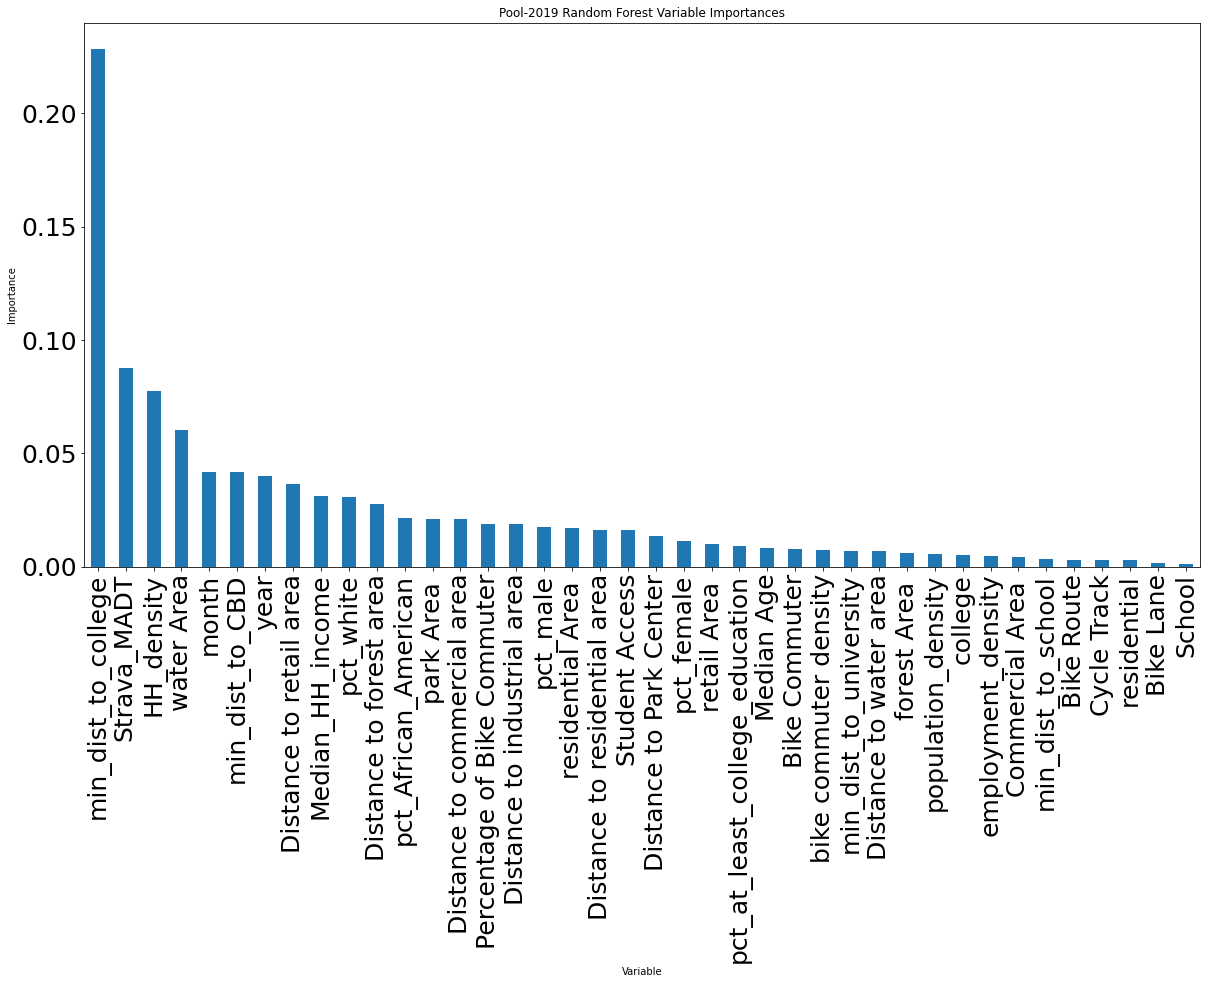

In [31]:
feature_importances_df = pd.DataFrame(brf_model.feature_importances_, index=X_data1.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [32]:
feature_importances_dfb=feature_importances_df.rename(columns={'Importance': 'Bike_Var_Importance'})
feature_importances_dfb['var']=feature_importances_dfb.index
feature_importances_dfb.head()

,Bike_Var_Importance,var
min_dist_to_college,0.228340,min_dist_to_college
Strava_MADT,0.087492,Strava_MADT
HH_density,0.077546,HH_density
water Area,0.060320,water Area
month,0.041659,month


In [33]:
feature_importances_df.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_RF_model_Variable_Importance.csv')

# Apply bike RF Model

In [34]:
# read 
bapp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_application_data.csv')
bapp['Path'] = np.where(bapp['Bicycle_Fa']=='Path', 1, 0)
bapp['Bike Route'] = np.where(bapp['Bicycle_Fa']=='Bike Route', 1, 0)
bapp['Bike Lane'] = np.where(bapp['Bicycle_Fa']=='Bike Lane', 1, 0)
bapp['Cycle Track'] = np.where(bapp['Bicycle_Fa']=='Cycle Track', 1, 0)
bapp['Trail'] = np.where(bapp['Bicycle_Fa']=='Trail', 1, 0)
bapp['Path'] = np.where(bapp['highway']=='Path', 1, 0)
bapp['cycleway'] = np.where(bapp['highway']=='cycleway', 1, 0)
bapp['secondary'] = np.where(bapp['highway']=='secondary', 1, 0)
bapp['tertiary'] = np.where(bapp['highway']=='tertiary', 1, 0)
bapp['primary'] = np.where(bapp['highway']=='primary', 1, 0)
bapp['residential'] = np.where(bapp['highway']=='residential', 1, 0)
bapp['service'] = np.where(bapp['highway']=='service', 1, 0)
bapp['trunk'] = np.where(bapp['highway']=='trunk', 1, 0)
bapp1=bapp[['month','year','min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [35]:
track=bapp[["ID"]]

In [36]:
bapp.head()

,Unnamed: 0.1,ID,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,1127,POLYGON ((-122.4103506127677 37.79611961207228...,3.019345,0.002189,0.249510,0.165813,0.131352,0.000000,1.762761,...,0,0,0,0,0,0,1,0,0,0
1,1,2415,POLYGON ((-122.42715829014239 37.7741559374201...,4.642047,0.000000,0.687274,0.087677,0.155897,0.000000,1.156915,...,1,0,0,0,0,0,1,0,0,0
2,2,2696,POLYGON ((-117.5649623942388 33.63601951720258...,30.272075,0.000000,4.698224,0.000000,5.178166,0.000000,4.852471,...,0,0,1,1,0,0,0,0,0,0
3,3,2735,POLYGON ((-122.25126407202679 37.8515272002856...,3.516737,0.008472,0.261220,0.035638,0.030689,0.000676,0.355484,...,1,0,0,0,0,0,0,0,1,0
4,4,3563,POLYGON ((-117.26290023488116 32.9906902025036...,77.836301,0.004015,0.124383,0.014682,0.099479,0.000000,5.174904,...,1,0,0,0,0,0,1,0,0,0


In [37]:
bapp1.shape

(258, 50)

In [38]:
predictions = brf_model.predict(bapp1)
predictions1 = pd.DataFrame({'Predicted_MADBT': predictions})
pred=pd.concat([bapp1,predictions1, track],axis=1)
pred.head()

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,month,year,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADBT,ID
0,1,2018,3.019345,0.002189,0.249510,0.165813,0.131352,0.000000,1.762761,0.000472,...,0,0,0,0,1,0,0,0,1307.465516,1127
1,1,2018,4.642047,0.000000,0.687274,0.087677,0.155897,0.000000,1.156915,0.012237,...,0,0,0,0,1,0,0,0,1332.782093,2415
2,1,2018,30.272075,0.000000,4.698224,0.000000,5.178166,0.000000,4.852471,0.013678,...,1,1,0,0,0,0,0,0,462.096620,2696
3,1,2018,3.516737,0.008472,0.261220,0.035638,0.030689,0.000676,0.355484,0.137718,...,0,0,0,0,0,0,1,0,297.324918,2735
4,1,2018,77.836301,0.004015,0.124383,0.014682,0.099479,0.000000,5.174904,0.000000,...,0,0,0,0,1,0,0,0,528.444310,3563


In [39]:
pred_save=pred[['ID','month','Predicted_MADBT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_MADBT_Prediction.csv')

In [40]:
pred_save['Predicted_MADBT'].describe()

count     258.000000
mean      369.011394
std       417.219177
min        10.939654
25%       129.236152
50%       241.710083
75%       376.643995
max      3102.857065
Name: Predicted_MADBT, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Predicted_MADBT'>

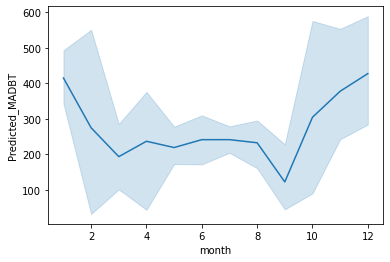

In [41]:
sns.lineplot(data=pred_save, x="month", y="Predicted_MADBT")

# Run Pedestrian RF model for iputation

In [42]:
pdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_data.csv')
pdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0,572,2018,1,188.971429,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,0.0,1.001268,...,0,0,0,0,0,0,0,0,0,0
1,1,1,572,2018,2,213.142857,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,0.0,1.001268,...,0,0,0,0,0,0,0,0,0,0
2,2,2,572,2018,3,235.550000,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,0.0,1.001268,...,0,0,0,0,0,0,0,0,0,0
3,3,3,572,2018,4,221.250000,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,0.0,1.001268,...,0,0,0,0,0,0,0,0,0,0
4,4,4,572,2018,5,220.435714,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,0.0,1.001268,...,0,0,0,0,0,0,0,0,0,0


In [43]:
pdata0['ID'].nunique()

208

In [44]:
# lets keep the data that we need for model tunning
pdata=pdata0[['month', 'year','AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]
pdata.columns

Index(['month', 'year', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path', 'Bike Route', 'Bike Lane', 'Cycle Track',
       'Trail', 'cycleway', 'secondary', 'tertiary', 'primary', 'residential',

In [45]:
# split data into X dataframe and Y dataframe:
X_data2 = pdata.drop("AASHTO_MADT", axis=1)
Y_data2 = pdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data2.shape} Y_data.shape: {Y_data2.shape}")

X_data.shape: (3665, 50) Y_data.shape: (3665,)


In [46]:
features2 = pdata.drop("AASHTO_MADT", axis=1)
feature_list2 = list(features2.columns)

In [47]:
X2 = np.asarray(X_data2)
Y2 = np.asarray(Y_data2)
print(f"X.shape: {X2.shape} Y.shape: {Y2.shape}")

X.shape: (3665, 50) Y.shape: (3665,)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X2, Y2, test_size=0.2,random_state=94704)

In [85]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-12 22:03:34,204	WARNING util.py:244 -- The `reset` operation took 0.536 s, which may be a performance bottleneck.
2023-05-12 22:03:34,215	WARNING util.py:244 -- The `start_trial` operation took 0.550 s, which may be a performance bottleneck.
2023-05-12 22:03:35,311	WARNING util.py:244 -- The `reset` operation took 0.648 s, which may be a performance bottleneck.
2023-05-12 22:03:35,317	WARNING util.py:244 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2023-05-12 22:03:38,695	WARNING util.py:244 -- The `reset` operation took 0.556 s, which may be a performance bottleneck.
2023-05-12 22:03:38,705	WARNING util.py:244 -- The `start_trial` operation took 0.567 s, which may be a performance bottleneck.
2023-05-12 22:03:46,890	WARNING util.py:244 -- The `reset` operation took 0.602 s, which may be a performance bottleneck.
2023-05-12 22:03:46,896	WARNING util.py:244 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(<ray.tune.trainable.util._Trainable object at 0x000002268A6C7E50> pid=10036) 2023-05-12 22:09:34,265	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 98, '_timesteps_total': None, '_time_total': 60.17755651473999, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000022A7BE97DC0> pid=6472) 2023-05-12 22:09:35,436	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_a5117532a2704e55a9e08afdbc1f7368
(<ray.tune.trainable.util._Trainable object at 0x0000022A7BE97DC0> pid=6472) 2023-05-12 22:09:35,436	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 98, '_timesteps_total': None, '_time_total': 60.30970358848572, '_episodes_total': None}
2023-05-12 22:09:36,012	WARNING util.py:244 -- The `reset` operation took 0.690 s, which may be a performance bottleneck.
2023-05-12 22:09:36,019	WARNING util.py:244 -- The `start_trial` operation took 0.698 s, which may be a p

In [86]:
tune_model.best_params_

{'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [49]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=pdata.loc[pdata['month']!=i]
    test=pdata.loc[pdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 187.7395814130621	Score Loss: 242.86273587757466
	Train RMSE: 613.7608033165995	Score RMSE: 559.3029436517594
	Train MAPE: 392.6318402397376	Score MAPE: 400.04422200346374
	Train R2:   0.8514810066544222	Score R2: 0.5448729275342521

	3-VOLUME SCORES: LOW (n=181), MED (n=85), HIGH (n=23), TOTAL IN Month (n=289)
	Low Loss: 167.5053040479195	Med Loss: 260.3553904480139	High Loss: 771.2461933854119
	Low RMSE: 432.3327831044383	Med RMSE: 658.2502555807513	High RMSE: 926.5169069129515
	Low MAPE: 237.94914543196032	Med MAPE: 74.81523810843309	High MAPE: 44.5062004103446
	Low R2:   -33.790747568264	Med R2: -14.91741174718875	High R2: -14.91741174718875


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 181.88027943087224	Score Loss: 247.60366778452683
	Train RMSE: 617.9706891284485	Score RMSE: 770.380425245115
	Train MAPE: 374.6356629829841	Score MAPE: 444.7625194599003
	Train R2:   0.8376898543088356	Score R2: 0.7891169331376523

	3-VOLUME SCORES: LOW (n=187), MED (n=98), HIGH (n=26), TOTAL IN Month (n=311)
	Low Loss: 135.9516183399729	Med Loss: 184.02201090138902	High Loss: 1290.2934993491076
	Low RMSE: 410.3649190820953	Med RMSE: 336.28801897112777	High RMSE: 2336.9990649979895
	Low MAPE: 247.68387337139038	Med MAPE: 52.608532744097914	High MAPE: 90.50857294816528
	Low R2:   -27.244054620324203	Med R2: -2.401709622738525	High R2: -2.401709622738525


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 185.32246201263163	Score Loss: 220.19248635824496
	Train RMSE: 611.9001407869072	Score RMSE: 601.8211108146369
	Train MAPE: 386.74234287216626	Score MAPE: 327.71703884369265
	Train R2:   0.8523476876029258	Score R2: 0.5510918523554601

	3-VOLUME SCORES: LOW (n=184), MED (n=93), HIGH (n=29), TOTAL IN Month (n=306)
	Low Loss: 113.55576270468374	Med Loss: 220.2777270446893	High Loss: 896.5107542346566
	Low RMSE: 303.6923506728377	Med RMSE: 560.727543086035	High RMSE: 1492.7289582247004
	Low MAPE: 187.14744521248545	Med MAPE: 58.51461194511997	High MAPE: 55.453924385438036
	Low R2:   -13.880361101057034	Med R2: -9.24772005329046	High R2: -9.24772005329046


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 184.905571173595	Score Loss: 187.46546461301676
	Train RMSE: 612.1681746060536	Score RMSE: 506.1205612974039
	Train MAPE: 382.2628373407164	Score MAPE: 323.5940767758314
	Train R2:   0.8365381379906323	Score R2: 0.9272282058049236

	3-VOLUME SCORES: LOW (n=158), MED (n=101), HIGH (n=37), TOTAL IN Month (n=296)
	Low Loss: 54.17384308580554	Med Loss: 167.36374652780447	High Loss: 811.5289707726336
	Low RMSE: 90.47642679765053	Med RMSE: 396.35291929048253	High RMSE: 1259.1581265051848
	Low MAPE: 108.76815424324758	Med MAPE: 47.52690168295682	High MAPE: 89.46495300797629
	Low R2:   -0.8984671182428832	Med R2: -3.645260073839136	High R2: -3.645260073839136


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 175.46845642751842	Score Loss: 266.22060741563865
	Train RMSE: 592.9253382921308	Score RMSE: 847.0297473973455
	Train MAPE: 377.5907028954124	Score MAPE: 380.2782394078604
	Train R2:   0.8508804229294853	Score R2: 0.7402472610857052

	3-VOLUME SCORES: LOW (n=164), MED (n=100), HIGH (n=41), TOTAL IN Month (n=306)
	Low Loss: 100.54572688725432	Med Loss: 180.38579101351684	High Loss: 1144.1163289195165
	Low RMSE: 350.23566488641825	Med RMSE: 326.7579245770694	High RMSE: 2145.6008654877282
	Low MAPE: 183.64312210770868	Med MAPE: 49.317707611333574	High MAPE: 95.80907465591544
	Low R2:   -22.429486999342437	Med R2: -2.8136511919618807	High R2: -2.8136511919618807


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 177.06592161948652	Score Loss: 265.5171912826742
	Train RMSE: 565.4081989180836	Score RMSE: 1242.5414014249343
	Train MAPE: 377.68999390727436	Score MAPE: 334.76658967734113
	Train R2:   0.8582475388807794	Score R2: 0.6069379636271848

	3-VOLUME SCORES: LOW (n=154), MED (n=103), HIGH (n=40), TOTAL IN Month (n=297)
	Low Loss: 82.26917623822737	Med Loss: 152.93498875655698	High Loss: 1260.9212207085463
	Low RMSE: 255.41383014793533	Med RMSE: 349.3231736003984	High RMSE: 3301.234186938006
	Low MAPE: 143.54559494612542	Med MAPE: 50.31840231860305	High MAPE: 97.30245796234429
	Low R2:   -11.655207426803505	Med R2: -2.654973185600748	High R2: -2.654973185600748


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 176.84185997490513	Score Loss: 272.0074609799066
	Train RMSE: 597.6197316622673	Score RMSE: 732.1630518018433
	Train MAPE: 377.81078151786096	Score MAPE: 366.6956958650936
	Train R2:   0.8569371472682612	Score R2: 0.5704500836752455

	3-VOLUME SCORES: LOW (n=160), MED (n=99), HIGH (n=48), TOTAL IN Month (n=307)
	Low Loss: 136.27356838541436	Med Loss: 143.28170274830646	High Loss: 989.9506459808896
	Low RMSE: 381.037337203441	Med RMSE: 246.3738512433389	High RMSE: 1679.1096332961326
	Low MAPE: 245.57789688244745	Med MAPE: 48.257987021380806	High MAPE: 67.66235227924041
	Low R2:   -26.070081188525144	Med R2: -0.827803478519811	High R2: -0.827803478519811


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 173.98328435253728	Score Loss: 277.52005585474325
	Train RMSE: 554.9249427418578	Score RMSE: 1018.6575153452508
	Train MAPE: 373.5392356165208	Score MAPE: 409.8554927853603
	Train R2:   0.8626402001205915	Score R2: 0.7382623749521294

	3-VOLUME SCORES: LOW (n=165), MED (n=111), HIGH (n=41), TOTAL IN Month (n=317)
	Low Loss: 96.36672918701731	Med Loss: 196.61877637931877	High Loss: 1225.5771515119848
	Low RMSE: 204.5350292659732	Med RMSE: 443.44389815626596	High RMSE: 2705.951847582653
	Low MAPE: 209.50475784244165	Med MAPE: 53.872142988293646	High MAPE: 94.11006256696443
	Low R2:   -6.720781280760168	Med R2: -5.205946142441985	High R2: -5.205946142441985


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 179.4209180961427	Score Loss: 242.39235071955017
	Train RMSE: 591.5233780615769	Score RMSE: 854.6015654673791
	Train MAPE: 375.4899849139947	Score MAPE: 364.00541584686187
	Train R2:   0.8421607078658926	Score R2: 0.8332589679362422

	3-VOLUME SCORES: LOW (n=164), MED (n=93), HIGH (n=37), TOTAL IN Month (n=295)
	Low Loss: 71.80635216966435	Med Loss: 143.2277568413476	High Loss: 1254.2092736924183
	Low RMSE: 132.5260460698399	Med RMSE: 262.4688781135709	High RMSE: 2360.5101363874564
	Low MAPE: 144.51989072965054	Med MAPE: 51.26995509219767	High MAPE: 99.83273111638236
	Low R2:   -2.231239079610394	Med R2: -1.120597617067412	High R2: -1.120597617067412


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 184.635953533832	Score Loss: 189.00993365624518
	Train RMSE: 605.2293541984517	Score RMSE: 571.207808739032
	Train MAPE: 375.9089233056553	Score MAPE: 414.15903371714035
	Train R2:   0.8419904458868919	Score R2: 0.8963341972201238

	3-VOLUME SCORES: LOW (n=198), MED (n=92), HIGH (n=36), TOTAL IN Month (n=326)
	Low Loss: 117.51217749690949	Med Loss: 122.2327140754728	High Loss: 752.9004870167875
	Low RMSE: 483.18501087304736	Med RMSE: 200.47598373917683	High RMSE: 1252.1380950534551
	Low MAPE: 207.82926796559232	Med MAPE: 45.56016974373177	High MAPE: 87.91197520859734
	Low R2:   -41.26389723405135	Med R2: -0.32104074745561184	High R2: -0.32104074745561184


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 185.72075176441678	Score Loss: 168.49395519780552
	Train RMSE: 618.301432449303	Score RMSE: 443.82950899494654
	Train MAPE: 378.75631014959964	Score MAPE: 413.57746266659615
	Train R2:   0.8500300097562079	Score R2: 0.7178910393215578

	3-VOLUME SCORES: LOW (n=204), MED (n=80), HIGH (n=30), TOTAL IN Month (n=315)
	Low Loss: 113.73736930242202	Med Loss: 145.1567510838861	High Loss: 608.2862609029778
	Low RMSE: 382.6671090346581	Med RMSE: 304.7819907557767	High RMSE: 908.2233509278141
	Low MAPE: 221.7883242380133	Med MAPE: 52.82853650329922	High MAPE: 55.9331753096151
	Low R2:   -26.388849817151804	Med R2: -1.898717588911294	High R2: -1.898717588911294


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_21820\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 183.8877473026137	Score Loss: 243.82085195921206
	Train RMSE: 613.698077437549	Score RMSE: 535.72567251954
	Train MAPE: 385.4884066647921	Score MAPE: 435.4900674340769
	Train R2:   0.8522800625611352	Score R2: 0.5169000119929605

	3-VOLUME SCORES: LOW (n=198), MED (n=73), HIGH (n=28), TOTAL IN Month (n=300)
	Low Loss: 184.60933684923458	Med Loss: 237.42659236630814	High Loss: 686.281062104008
	Low RMSE: 494.5345898128704	Med RMSE: 404.6104393463331	High RMSE: 958.4950132493485
	Low MAPE: 277.54124066682164	Med MAPE: 65.19375414661309	High MAPE: 66.0874638339578
	Low R2:   -44.12089796133895	Med R2: -6.801433484075122	High R2: -6.801433484075122


Low MAE Average: 114.52558039121044 +/- 36.16402004856707
Low RMSE Average: 326.75009141260045 +/- 126.32409494775914
Low MAPE Average: 201.29155946982374 +/- 47.81157217148912
Low R2 Average: -21.39117261628932 +/- 13.847364568190155


Med

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

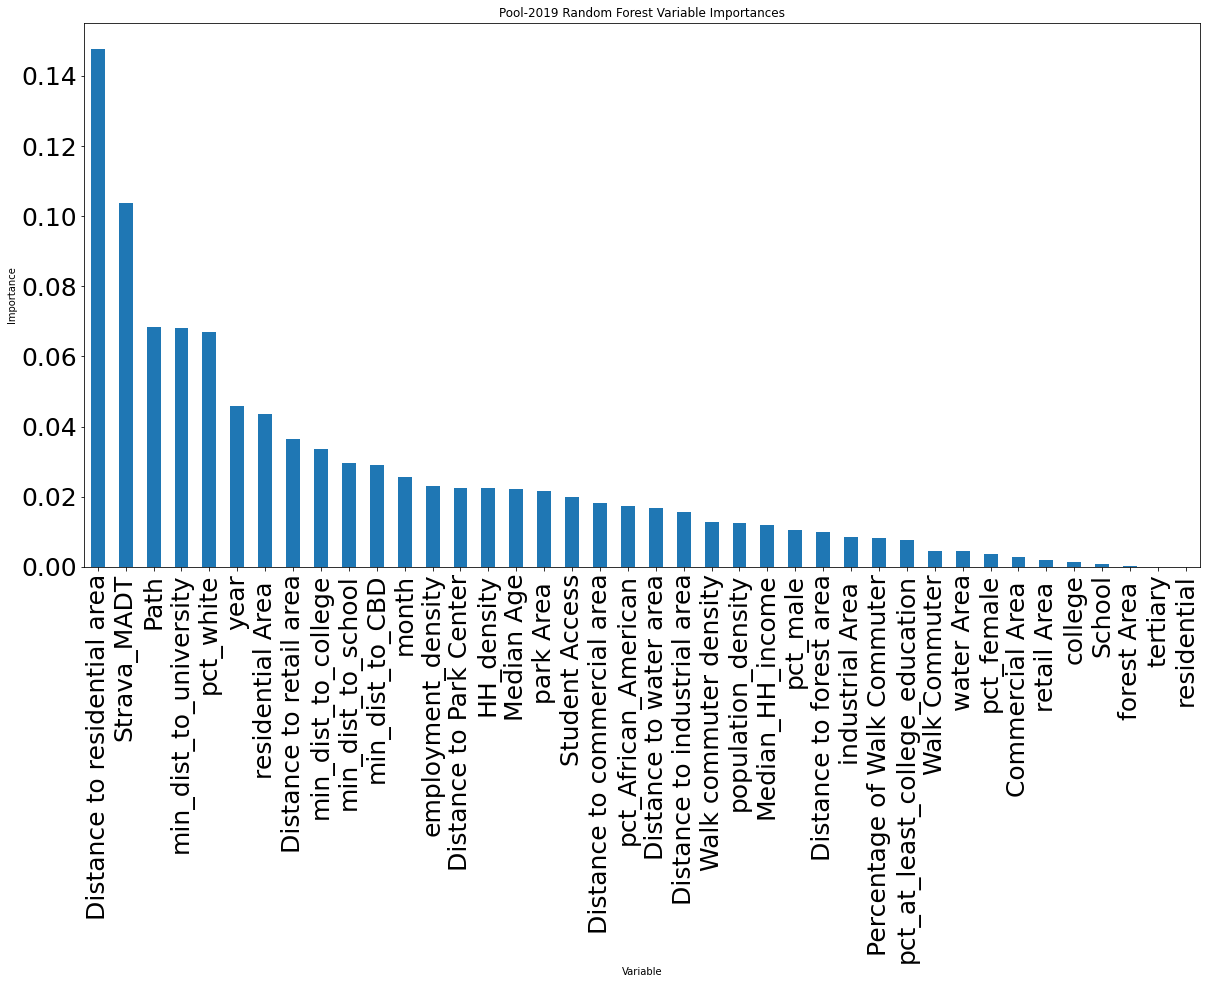

In [50]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features2, round(importance, 4)) for feature, importance in zip(feature_list2, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances_dfp = pd.DataFrame(brf_model.feature_importances_, index=X_data2.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_dfp[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [51]:
feature_importances_dfp=feature_importances_dfp.rename(columns={'Importance': 'Ped_Var_Importance'})
feature_importances_dfp['var']=feature_importances_dfp.index
feature_importances_dfp.head()

,Ped_Var_Importance,var
Distance to residential area,0.147642,Distance to residential area
Strava_MADT,0.103876,Strava_MADT
Path,0.068464,Path
min_dist_to_university,0.068200,min_dist_to_university
pct_white,0.067011,pct_white


In [52]:
var_import=pd.merge(feature_importances_dfb,feature_importances_dfp, on=['var'], how='inner')
var_import.head()

,Bike_Var_Importance,var,Ped_Var_Importance
0,0.228340,min_dist_to_college,0.033625
1,0.087492,Strava_MADT,0.103876
2,0.077546,HH_density,0.022481
3,0.060320,water Area,0.004587
4,0.041659,month,0.025516


In [53]:
var_import.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_ped_RF_model_Variable_Importance.csv')

# Apply Pedestrian RF Model

In [54]:
# read 
papp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_application_data.csv')
papp1=papp[['month', 'year', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [55]:
papp['ID'].nunique()

74

In [56]:
check=papp.loc[papp['ID']==62864]
check

,Unnamed: 0.1,ID,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
128,130,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
129,131,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
130,132,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
131,133,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
132,134,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
133,135,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
134,136,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
135,137,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0
136,138,62864,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,0.0,13.649447,...,0,0,0,0,0,0,0,0,0,0


In [57]:
track=papp[["ID"]]

In [58]:
predictions = brf_model.predict(papp1)
predictions1 = pd.DataFrame({'Predicted_MADPT': predictions})
pred=pd.concat([papp1,predictions1, track],axis=1)
pred.head()

,month,year,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADPT,ID
0,1,2018,4.889865,0.0,0.515058,0.0,0.655687,0.0,1.198112,0.00000,...,0,0,0,0,0,0,0,0,274.259834,588
1,1,2018,4.889865,0.0,0.515058,0.0,0.655687,0.0,1.198112,0.00000,...,0,0,0,0,0,0,0,0,274.259834,589
2,1,2018,5.423048,0.0,0.987122,0.0,0.573773,0.0,0.551175,0.00000,...,0,0,0,0,0,0,0,0,204.133128,780
3,1,2018,5.423048,0.0,0.987122,0.0,0.573773,0.0,0.551175,0.00000,...,0,0,0,0,0,0,0,0,204.133128,781
4,1,2018,30.272075,0.0,4.980704,0.0,5.164795,0.0,4.968207,0.00945,...,0,0,0,0,0,0,0,0,465.213236,2696


In [59]:
pred_save=pred[['ID','month','Predicted_MADPT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_MADPT_Prediction.csv')

In [60]:
pred_save['Predicted_MADPT'].describe()

count     167.000000
mean      671.537175
std       692.643049
min        54.484842
25%       323.868887
50%       485.880432
75%       661.247429
max      3480.717776
Name: Predicted_MADPT, dtype: float64

# End of the Modeling